In [79]:
from FuncParcel import *
import numpy as np
import nibabel as nib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from dFC_graph import coupling
from matplotlib import colors
import pickle as pickle
%matplotlib inline

## bar plots of t values associate of regression betas (Tha Nuclei <-> graph metrics)

In [113]:
#load data
measures = ['PC', 'WMD', 'WW', 'BW', 'q']
NKI_Rest = pd.read_csv('Data/NKI_grpTarget_MTD_noImpose_Partial_df.csv')
HCP_Rest = pd.read_csv('Data/HCP_Rest_grpTarget_MTD_noImpose_Partial_df.csv')
HCP_WM = pd.read_csv('Data/HCP_WM_PCTarget_MTD_noImpose_df.csv')
HCP_MOTOR = pd.read_csv('Data/HCP_MOTOR_grpTarget_MTD_nompose_df.csv')
#nd = pd.read_csv('Data/NonTarget_MTD_Node_df.csv')

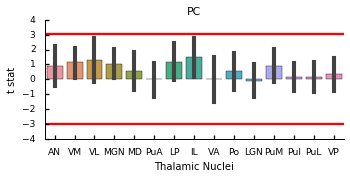

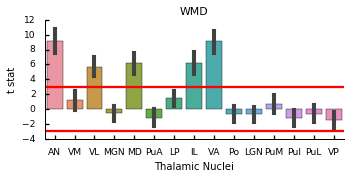

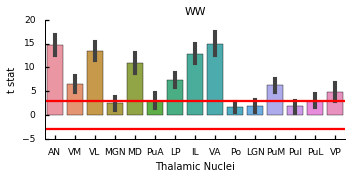

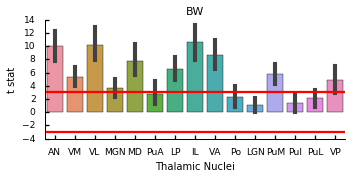

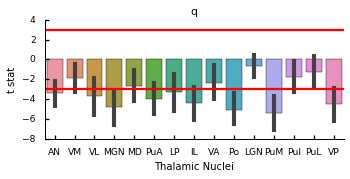

In [115]:
for measure in measures:
	sns.set_context("talk", font_scale=0.7)
	#plt.figure(figsize=(8, 6))
	sns_plot = sns.factorplot(x='Thalamic Nuclei', y=measure, data=NKI_Rest , kind='bar', size=2.5, aspect=2)
	plt.axhline(y=3.02, color='r', linestyle='-')
	plt.axhline(y=-3.02, color='r', linestyle='-')
	plt.ylabel('t stat')
	plt.title(measure)
	#fn =  'test.png'
	#sns_plot.savefig(fn)



## visualize target locations

In [75]:
from nilearn import image
from nilearn import plotting
import nibabel as nib



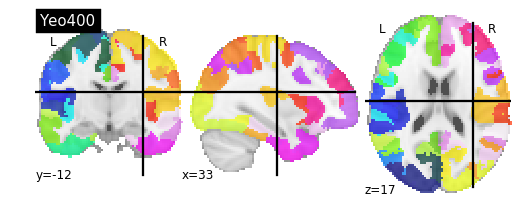

In [76]:
# take a look at Yeo 400 ROIs
ROIspath='/home/despoB/kaihwang/Rest/ROIs/400ROIs.nii.gz'
ROIs=image.load_img(ROIspath)

plotting.plot_roi(ROIs, title="Yeo400")
plotting.show()

In [70]:
# short hand function to select Target ROIs for plotting
def mask_image(atlas_path, select_ROIs):

    image = nib.load(atlas_path)
    image_data = image.get_data()

    #header = image.header()
    #header.set_data_dtype(np.float)

    value_data = image_data.copy()	
    value_data[value_data!=0]=0

    for ix,i in enumerate(select_ROIs):
        value_data[image_data==select_ROIs[ix]] = 5

    image_data[:,:,:,] = value_data[:,:,:,]
    return image


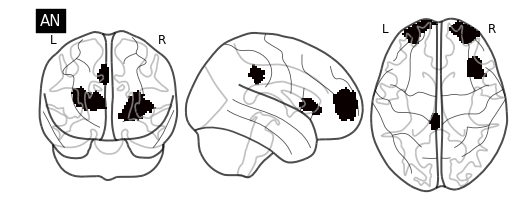

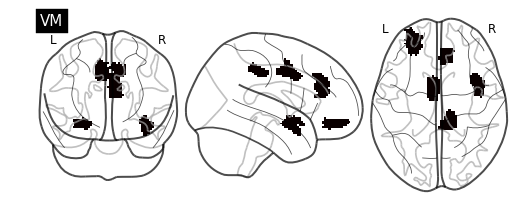

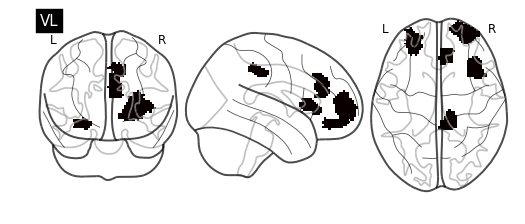

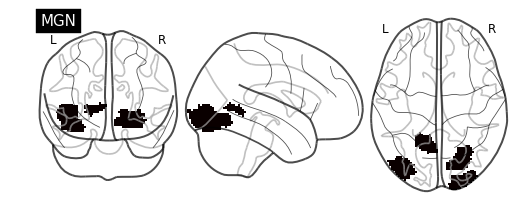

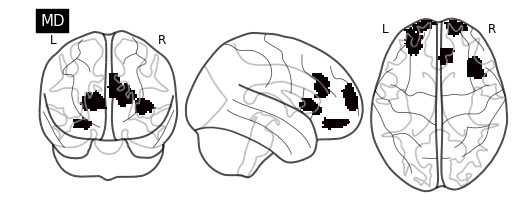

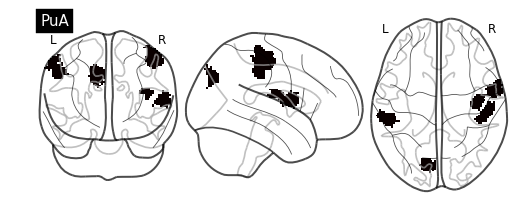

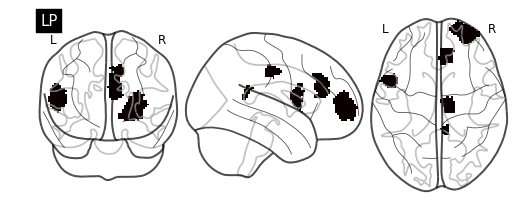

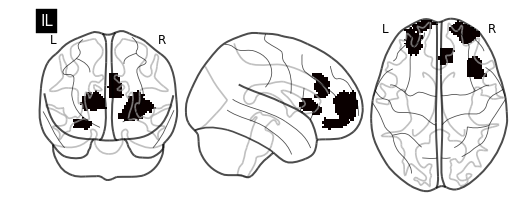

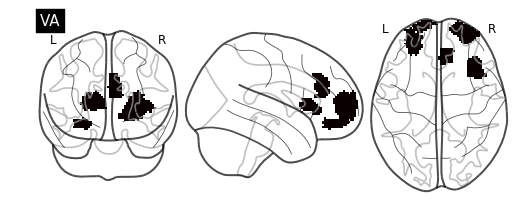

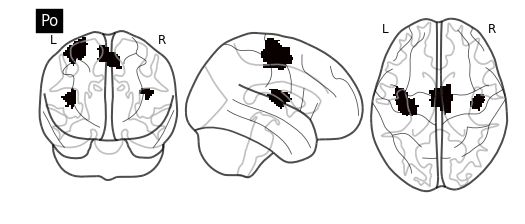

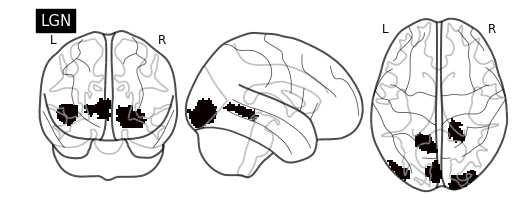

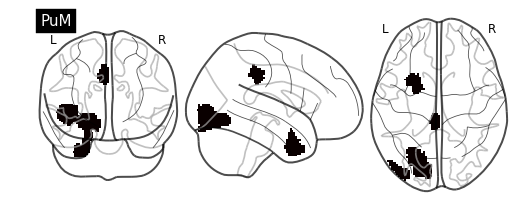

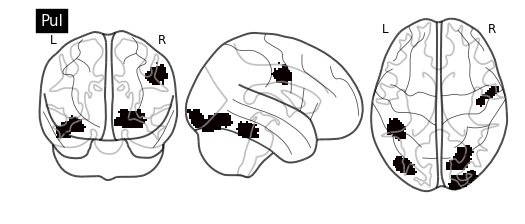

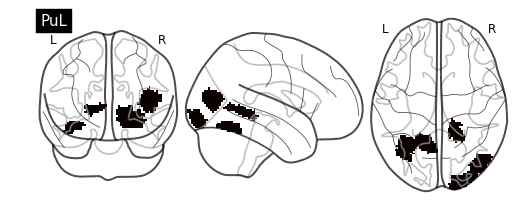

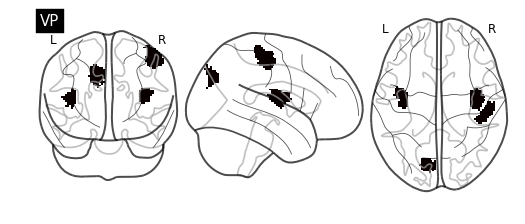

In [78]:
MaxYeo400_Morel = np.load('Data/MaxYeo400_Morel.npy')
Nuclei = ['AN','VM', 'VL', 'MGN', 'MD', 'PuA', 'LP', 'IL', 'VA', 'Po', 'LGN', 'PuM', 'PuI', 'PuL', 'VP']

for i, nuc in enumerate(Nuclei):
    plotting.plot_glass_brain(mask_image(ROIspath, MaxYeo400_Morel[i]), title=nuc)

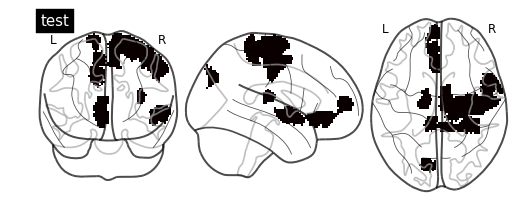

In [112]:
plotting.plot_glass_brain(mask_image(ROIspath,[228, 232, 237, 224, 229, 238, 162, 163,  40, 236, 230, 242, 248,
       231, 235, 244,  30, 225,  24]), title='test')

In [ ]:
from ThaGate import consolidate_task_graph